In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
#import arch.unitroot as at 
import statsmodels.api as sm
import statistics
from collections import defaultdict
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start='2018-1-1'
end='2018-12-31'

In [3]:
list_of_etfs = ['ACC','ADANIPORTS','AMBUJACEM','ASIANPAINT','AXISBANK','BANKBARODA','BHEL','BPCL', 'BOSCHLTD','CIPLA', 'COALINDIA', 'DRREDDY',                     'GAIL','GRASIM','HCLTECH','HDFCBANK','HEROMOTOCO','HINDALCO','HINDUNILVR', 'HDFC','ITC', 'ICICIBANK', 'IDEA', 'INDUSINDBK','INFY',                  'KOTAKBANK','LT','LUPIN', 'MARUTI','NTPC', 'ONGC', 'POWERGRID','PNB','RELIANCE','SBIN','SUNPHARMA','TCS','TATAMOTORS', 'TATAPOWER',                 'TATASTEEL', 'TECHM', 'ULTRACEMCO', 'VEDL','WIPRO','YESBANK','ZEEL']
left = ['BHARTIARTL']
for etf in list_of_etfs:
    try:
        exec('{} = pd.DataFrame()'.format(etf))
        exec('{} = pdr.get_data_yahoo("{}"+".NS",start,end)'.format(etf,etf)) 
    except:
        print("Data not available for", etf)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
for i in list_of_etfs:
    exec('{}["Norm Close"] = {}["Close"] / {}["Close"][0]'.format(i,i,i))

,Open,High,Low,Close,Adj Close,Volume,Norm Close
Date,,,,,,,
2018-01-01,1763.949951,1763.949951,1725.000000,1731.349976,1639.139526,123565,1.000000
2018-01-02,1736.199951,1745.800049,1725.000000,1743.199951,1650.358398,277110,1.006844
2018-01-03,1741.099976,1780.000000,1740.099976,1774.599976,1680.086060,194666,1.024981
2018-01-04,1779.949951,1808.000000,1770.000000,1801.349976,1705.411377,278240,1.040431
2018-01-05,1801.099976,1820.400024,1795.599976,1809.949951,1713.553467,312489,1.045398
...,...,...,...,...,...,...,...
2019-12-23,1443.500000,1474.849976,1441.250000,1467.250000,1445.986694,557537,0.847460
2019-12-24,1472.900024,1476.050049,1451.199951,1460.599976,1439.432983,372278,0.843619
2019-12-26,1464.400024,1470.000000,1448.099976,1451.699951,1430.661987,324912,0.838479


In [5]:
for p in range(len(list_of_etfs)):
    i = list_of_etfs[p]
    for q in range(p+1,len(list_of_etfs)):
        j = list_of_etfs[q]
        if(i==j):
            pass
        else:
            col_name = "diff_"+str(j)
            exec('{}["{}"] = {}["Norm Close"] - {}["Norm Close"]'.format(i,col_name,i,j))
            exec('{}["{}"] = {}["{}"].abs()'.format(i,col_name,i,col_name))

In [6]:
mean_stddev_dict = defaultdict(lambda: defaultdict(dict))
dict_mean = dict()
dict_stddev = dict()
for p in range(len(list_of_etfs)):
    i = list_of_etfs[p]
    for q in range(p+1,len(list_of_etfs)):
        j = list_of_etfs[q]
        if (i==j):
            pass
        else:
            key_name = i+'-'+j
            col_name = "diff_"+str(j)
            exec('mean_stddev_dict["{}"]["{}"]["mean"] = {}[col_name].mean()'.format(i,j,i))
            exec('mean_stddev_dict[i][j]["std_dev"] = {}[col_name].std()'.format(i))
            exec('dict_mean[key_name] = {}[col_name].mean()'.format(i))
            exec('dict_stddev[key_name] = {}[col_name].std()'.format(i))

In [7]:
print(dict_mean['ACC-RELIANCE'])
print(dict_stddev['ACC-RELIANCE'])
print(mean_stddev_dict['ACC']['RELIANCE'])

0.2718264979459252
0.1517236376180625
{'mean': 0.2718264979459252, 'std_dev': 0.1517236376180625}


In [8]:
from heapq import nlargest,nsmallest
high_mean_10 = nlargest(10, dict_mean, key = dict_mean.get) 
low_mean_10 = nsmallest(10, dict_mean, key = dict_mean.get) 

In [9]:
print([dict_mean[i] for i in high_mean_10])

[0.7958933476635931, 0.7720845555958165, 0.7717898581381745, 0.748061414346637, 0.6781050668631274, 0.6713167156767574, 0.6540082734478876, 0.64753544225155, 0.6405460691573475, 0.6162735723977737]


In [10]:
print([dict_mean[i] for i in low_mean_10])

[0.03049237981045088, 0.03238871140077954, 0.03301276609977153, 0.03696689124319661, 0.04116676160151217, 0.04120466066706059, 0.04193557106707258, 0.041977870927016, 0.042205587761777734, 0.0425551387240429]


In [11]:
lowest_dict = dict()
for i in low_mean_10:
    lowest_dict[i] = dict_mean[i] * dict_stddev[i]

In [12]:
convergent = nsmallest(2, lowest_dict, key = lowest_dict.get)
print(convergent)
print([dict_stddev[i] for i in convergent])
print([dict_mean[i] for i in convergent])

['HEROMOTOCO-ZEEL', 'ACC-AMBUJACEM']
[0.023206352688300173, 0.023360849005243402]
[0.03049237981045088, 0.03301276609977153]


In [13]:
highest_dict = dict()
for i in high_mean_10:
    highest_dict[i] = dict_mean[i] - dict_stddev[i]

In [14]:
divergent = nlargest(2, highest_dict, key = highest_dict.get)
print(divergent)
print([dict_stddev[i] for i in divergent])
print([dict_mean[i] for i in divergent])

['PNB-TECHM', 'PNB-TCS']
[0.28039795128879386, 0.33499601187986455]
[0.7717898581381745, 0.7958933476635931]


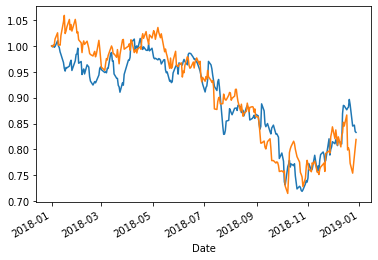

In [19]:
#CONVERGENT

HEROMOTOCO['Norm Close'].plot()
ZEEL['Norm Close'].plot()

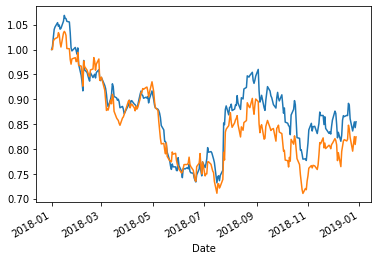

In [20]:
ACC['Norm Close'].plot()
AMBUJACEM['Norm Close'].plot()

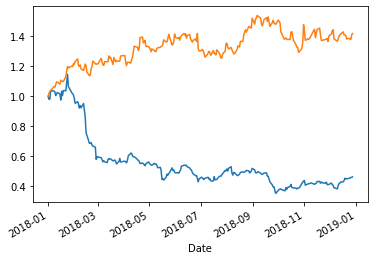

In [21]:
#Divergent

PNB['Norm Close'].plot()
TECHM['Norm Close'].plot()

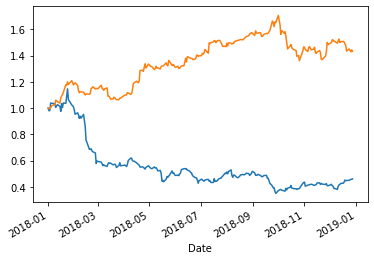

In [22]:
PNB['Norm Close'].plot()
TCS['Norm Close'].plot()

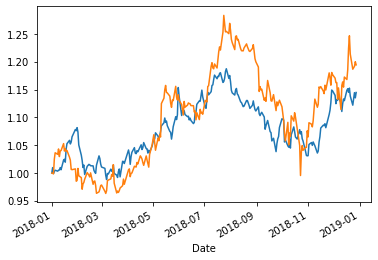

In [23]:
#CONVERGENT

HDFCBANK['Norm Close'].plot()
ASIANPAINT['Norm Close'].plot()

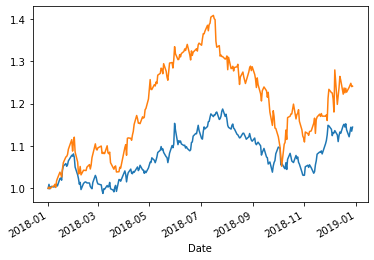

In [24]:
#CONVERGENT

HDFCBANK['Norm Close'].plot()
KOTAKBANK['Norm Close'].plot()

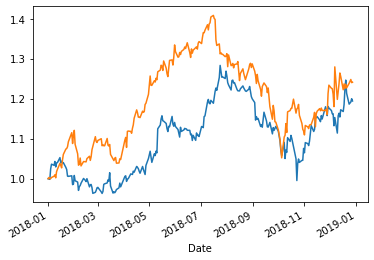

In [25]:
#CONVERGENT

ASIANPAINT['Norm Close'].plot()
KOTAKBANK['Norm Close'].plot()

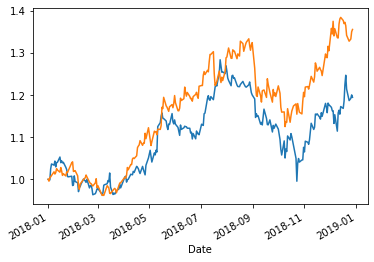

In [26]:
#CONVERGENT

ASIANPAINT['Norm Close'].plot()
HINDUNILVR['Norm Close'].plot()  